In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
labelsize=12

from matplotlib.patches import Polygon

In [2]:
def recast(name,BDlike=False):
    data=np.log10(np.loadtxt(name))
    data[:,0]=data[:,0]+3
    if BDlike:
        data=np.concatenate([data[:,(0,1)],np.flipud(data[:,(0,2)])], axis=0)
        data=data[data[:,1]<3]
    else:
        data=np.concatenate(([[data[0,0],6.0]],data, [[data[-1,0],6.0]]), axis=0)
    
    return data


In [3]:
nu_scattering_null=np.array([[1,1],[100,1]])

In [4]:
clist=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i,h in enumerate(clist):
    h=h.lstrip('#')
    rgb_str=str([int(h[i:i+2], 16) for i in (0, 2, 4)]).lstrip('[').rstrip(']')
#     rgb_str=rgb_str.lstrip('[')
    print('\definecolor{C'+str(i)+'}{RGB}{'+rgb_str +"}")

\definecolor{C0}{RGB}{31, 119, 180}
\definecolor{C1}{RGB}{255, 127, 14}
\definecolor{C2}{RGB}{44, 160, 44}
\definecolor{C3}{RGB}{214, 39, 40}
\definecolor{C4}{RGB}{148, 103, 189}
\definecolor{C5}{RGB}{140, 86, 75}
\definecolor{C6}{RGB}{227, 119, 194}
\definecolor{C7}{RGB}{127, 127, 127}
\definecolor{C8}{RGB}{188, 189, 34}
\definecolor{C9}{RGB}{23, 190, 207}


## C model plot 

In [5]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

def combine_poly(xy1,xy2):
    polygon1 = Polygon(xy1)
    polygon2 = Polygon(xy2)
    polygons = [polygon1, polygon2]
    u = cascaded_union(polygons)
    xy3=np.array(u.boundary.xy)
    xy3=np.transpose(xy3)
    return xy3
# combine_poly([(0, 0), (5, 3), (5, 0)], [(0, 0), (3, 10), (3, 0)])    

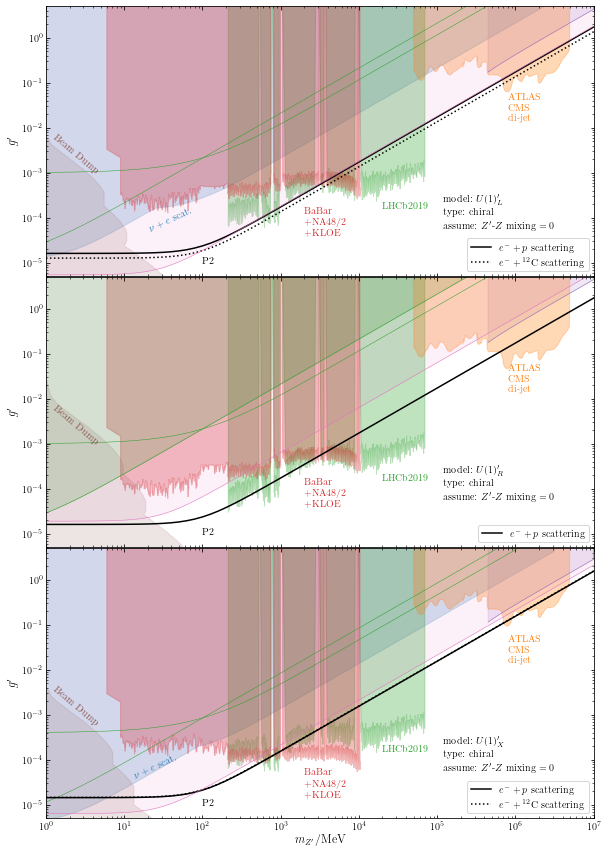

In [10]:
import imp

fig, axs = plt.subplots(3,1,sharex=True, figsize=(8.27,11.7))

# basic_name="C_model"
   
for iax in range(3):
    model_name_ext=str(iax+1)
    ax=axs[iax]

    if iax in [0,2]:
        data=[]
        for name in ["CHARMII","TEXONO"]:
            data1=np.loadtxt("data/"+name+["_gU1L","_gU1R","_gU1X"][iax]+".dat")       
            data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
                ])
            data=combine_poly(data1,data)
        data =10**data
        ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    

    
    
    alphas=[0.3,0.5,0.3,0.3]
    for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt']):
        data = 10**recast("data/C_model/"+limit_name+model_name_ext+".dat")
        ax.fill(data[:,0],data[:,1],alpha = alphas[i],color="C2")
        
    data=[]
    for i,limit_name in enumerate(['BaBar_Lees2014xha',"NA48_Batley2015lha","KLOE_Babusci2012cr"]):
        data1 = recast("data/C_model/"+limit_name+model_name_ext+".dat")
        data=combine_poly(data1,data)
        
    data=10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C3")
    
    
    data=[]
    for tempi,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw","E774_Bross1989mp",
                                       "Orsay_Davier1989wz"]):
        data1 = recast("data/C_model/"+limit_name+model_name_ext+".dat",BDlike=True)
        data=combine_poly(data1,data)
    data = 10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.15,color="C5")
    
    ############## begin LEP bounds ######################
    lep_color="C4"
    data=np.loadtxt(r"data/LEP/"+["U1L.csv","U1R.csv","U1X.csv"][iax],delimiter=",")
    data[:,0]=1e3*data[:,0]
    data=np.vstack([   data, [[data[-1,0],10],[data[0,0],10]]   ])
    ax.fill(data[:,0],data[:,1],alpha = 0.15,color=lep_color)
    ax.plot(data[:,0],data[:,1],color=lep_color,lw=0.5)

    ############## end LEP bounds ######################
    

     


    ############## begin g-2 bounds ######################

    model=imp.load_source("xfs","darkcast/models/C_model"+str(iax+1)+".py")
    xfs=model.xfs
    g_2_e_color="C2"

    data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
    data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["e"])
    if iax==1:
        ax.fill(data[:,0],data[:,1],alpha = 0.2,color=g_2_e_color)
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5) 
    
    data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
#     data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["mu"])
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)
    ############## end  g-2 bounds ######################
    
    dijet_color="C1"
    dijet=np.loadtxt(r"data/dijet.csv",delimiter=",");
    dijet[:,0]=1e3* 10**dijet[:,0]
    dijet[:,1]=dijet[:,1]/xfs["u"]
    ax.fill(dijet[:,0],dijet[:,1],alpha=0.3,color=dijet_color)

    ###### other labels ######
    if iax in [0,1,2]:
        ax.text(8e5, 1.5e-2,"ATLAS\n CMS\n di-jet",color=dijet_color,rotation=0)
#         ax.text(4e6, 9e-1,"LEP",color=lep_color,rotation=32)
        ax.text(2e4, 0.16e-3,r"LHCb2019",color="C2",rotation=0)
        ax.text(0.2e4, [0.4e-4,0.4e-4,0.15e-4][iax],"BaBar\n +NA48/2\n +KLOE",color="C3",rotation=0)
#         ax.text(3e1, 3.0e-4,r"NA48/2+KLOE",color="C4",rotation=0)
#         ax.text(0.3e1, [3e-4,3e-4,1e-4][iax],r"$(g-2)_{\mu,\ e}$",color=g_2_e_color,rotation=25) 
        ax.text([1.2e0,1.2e0,1.2e0][iax], [1e-3,1e-3,0.6e-3][iax],
                r"Beam Dump",color="C5",rotation=-40)
        ax.text(100, 1e-5,r"P2",color="k",rotation=0)

        
    if iax in [0,2]:
        ax.text([2e1,2e1,1.3e1][iax], [0.5e-4,0.5e-4,0.4e-4][iax],
                r"$\nu+e$ scat.",color="C0",rotation=25)
    ##########################
    
    P2bounds=10**np.loadtxt(r"data/C_model/gx_bounds"+str(iax+1)+".csv",delimiter=",")
    ax.plot(P2bounds[:,0],P2bounds[:,1],color="k",label=r"$e^-+p$ scattering") 
    
    if min(P2bounds[:,2])<1:
        ax.plot(P2bounds[:,0],P2bounds[:,2],color="k",ls=":",label=r"$e^-+{}^{12}$C scattering") 
        
    ax.plot(P2bounds[:,0],P2bounds[:,3],color="C6",lw=0.5) 
    data=P2bounds[:,[0,3]]
    data=np.vstack([     data,[[1e7,10],[1,10]]    ])
    ax.fill(data[:,0],data[:,1],color="C6",alpha=0.1) 

#     ax.text(0.8e5, 1.0e-4,r"$g'/s_{\theta}=$"+str(xlist[iax]),color="k",rotation=0)
    r=2;
    ax.text(1.2e5, r*r*0.5e-4,[r"model: $U(1)'_L$",
                         r"model: $U(1)'_R$",
                         r"model: $U(1)'_X$"][iax],color="k",rotation=0)
    ax.text(1.2e5, r*0.6e-4,r"type: chiral",color="k",rotation=0)
    ax.text(1.2e5, 0.6e-4,"assume: $Z'$-$Z$ mixing $=0$",color="k",rotation=0)
    
    


    ax.set_xlim(1,1e7)
    ax.set_ylim(0.5e-5,5e-0)
#     ax.set_ylim([1e-5,1e-6,1e-7][iax],[1e-0,1e-1,1e-2][iax])
    ax.legend()
    ax.loglog()

    ax.tick_params(which='both', direction='in',top=True,right=True)
    ax.set_ylabel(r"$g'$",fontsize=labelsize)


plt.xlabel(r"$m_{Z'}/\rm{MeV}$",fontsize=labelsize)

fig.tight_layout(pad=0.1)


plt.savefig(r'../fig_workshop/C.pdf',bbox_inches='tight')
plt.show()

## theta plot 

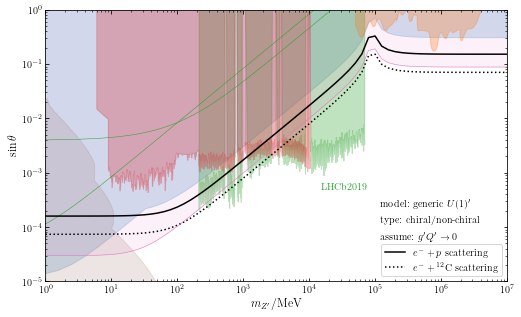

In [11]:
fig, ax = plt.subplots(figsize=(8.27,5) )

# charmII=10**np.loadtxt("data/CHARMII_theta.dat")
# TEXONO=10**np.loadtxt("data/TEXONO_theta.dat")
# for i,data in enumerate([TEXONO,charmII]):
#     data=np.vstack([data,[[data[-1,0],1],[0,1]] 
#     ])
#     x=data[:,0]
#     y=data[:,1]
#     ax.fill(x,y,alpha = 0.3,color=["C1","C0"][i])

data=[]
for name in ["CHARMII","TEXONO"]:
    data1=np.loadtxt("data/"+name+"_theta.dat")       
    data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
        ])
    data=combine_poly(data1,data)
data =10**data
ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    
    

#################begin####LHCb, Babar, NA48,KLOE#################
for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt']):
    data = 10**recast("data/theta_model/"+limit_name+".dat")
    ax.fill(data[:,0],data[:,1],alpha = [0.3,0.3,0.3,0.3][i],color=["C2","C3","C4","C5"][i])
    
    
data=[]
for i,limit_name in enumerate(['BaBar_Lees2014xha',"NA48_Batley2015lha","KLOE_Babusci2012cr"]):
    data1 = recast("data/theta_model/"+limit_name+".dat")
    data=combine_poly(data1,data)

data=10**data 
ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C3")
#################end #### LHCb, Babar, NA48,KLOE#################

# col_list=["C5","C6","C7","C8"]
# for i,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw",
#                                "E774_Bross1989mp","Orsay_Davier1989wz"]):
#     data = 10**recast("data/theta_model/"+limit_name+".dat",BDlike=True)
#     ax.fill(data[:,0],data[:,1],alpha = 0.3,color=col_list[i])

     
#################begin beam dump ##
data=[]
for tempi,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw","E774_Bross1989mp",
                                   "Orsay_Davier1989wz"]):
    data1 = recast("data/theta_model/"+limit_name+".dat",BDlike=True)
    data=combine_poly(data1,data)
data = 10**data 
ax.fill(data[:,0],data[:,1],alpha = 0.15,color="C5")   
#################end beam dump ##


# data=np.loadtxt("data/atomic_PV.dat")
# data = 10**data 
# # ax.fill(data[:,0],data[:,1],alpha = 0.15,color="C5")  
# ax.plot(data[:,0],data[:,1],alpha =1,color="r")  

# g_2_e_color="C4"

# data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
# data=np.vstack([     data,[[0,1]]    ])
# data=10**data; 
# data[:,1]=data[:,1]/(xfs["e"])
# ax.plot(data[:,0],data[:,1],alpha = 0.2,color=g_2_e_color)

# data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
# #     data=np.vstack([     data,[[0,1]]    ])
# data=10**data; 
# data[:,1]=data[:,1]/(xfs["mu"])
# ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)
##############begin  g-2 bounds ######################
from darkcast.models.theta_model import xfs
g_2_e_color="C2"

data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
# data=np.vstack([     data,[[0,1]]    ])
data=10**data; 
data[:,1]=data[:,1]/(xfs["e"])
ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5) 

data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
#     data=np.vstack([     data,[[0,1]]    ])
data=10**data; 
data[:,1]=data[:,1]/(xfs["mu"])
ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)
##############end  g-2 bounds ######################


############## begin LEP bounds ######################
# lep_color="C4"
# data=np.loadtxt(r"data/LEP/U1theta.csv",delimiter=",")
# data[:,0]=1e3*data[:,0]
# data=np.vstack([   data, [[data[-1,0],10],[data[0,0],10]]   ])
# ax.fill(data[:,0],data[:,1],alpha = 0.15,color=lep_color)
# ax.plot(data[:,0],data[:,1],color=lep_color,lw=1)

############## end LEP bounds ######################


dijet_color="C1"
dijet=np.loadtxt(r"data/dijet.csv",delimiter=",");
dijet[:,0]=1e3* 10**dijet[:,0]
dijet[:,1]=dijet[:,1]/xfs["u"]
ax.fill(dijet[:,0],dijet[:,1],alpha=0.3,color=dijet_color)


###### other labels ######
# ax.text(3e5, 3.5e-2,"ATLAS\n CMS\n di-jet",color=dijet_color,rotation=0)

# plt.text(70, 8e-4,r"CHARM-II",color="C0",rotation=35,fontsize=8)
# plt.text(15, 1.5e-4,r"Texono",color="C1",rotation=42)

plt.text(1.5e4, 5e-4,r"LHCb2019",color="C2",rotation=0)
# plt.text(0.4e4, 5e-4,r"BaBar",color="C3",rotation=0)
# ax.text(0.2e4, 4e-4,"BaBar\n +NA48/2\n +KLOE",color="C3",rotation=0)

# plt.text(0.5e1, 5.5e-3,r"$(g-2)_{\mu}$",color=g_2_e_color,rotation=5)
# plt.text(1.0e1, 2.5e-3,r"$(g-2)_{e}$",color=g_2_e_color,rotation=39)
##########################

P2bounds=10**np.loadtxt(r"data/theta_bounds3.csv",delimiter=",")
plt.plot(P2bounds[:,0],P2bounds[:,1],color="k",label="$e^-+p$ scattering")  

plt.plot(P2bounds[:,0],P2bounds[:,2],color="k",ls=":",label=r"$e^-+{}^{12}$C scattering") 

plt.plot(P2bounds[:,0],P2bounds[:,3],color="C6",lw=0.5) 
data=P2bounds[:,[0,3]]
data=np.vstack([     data,[[1e7,10],[1,10]]    ])
ax.fill(data[:,0],data[:,1],color="C6",alpha=0.1) 


# plt.text(100, 0.6e-4,r"P2",color="k",rotation=0)


r=2;
ax.text(1.2e5, r*r*0.6e-4,r"model: generic $U(1)'$",color="k",rotation=0)
ax.text(1.2e5, r*0.6e-4,r"type: chiral/non-chiral",color="k",rotation=0)
ax.text(1.2e5, 0.6e-4,r"assume: $g'Q'\rightarrow 0$",color="k",rotation=0)

plt.xlim(1,1e7)
plt.ylim(1e-5,1e-0)
plt.tick_params(which='both', direction='in',top=True,right=True)


plt.xlabel(r"$m_{Z'}/\rm{MeV}$",fontsize=labelsize)
plt.ylabel(r"$\sin \theta$",fontsize=labelsize)
plt.legend()
plt.loglog()


plt.savefig(r'../fig_workshop/theta.pdf',bbox_inches='tight')
plt.show()

## $\epsilon$ plot 

In [13]:
EWPT=np.loadtxt("data/EWPT.csv",delimiter=",")
EWPT[:,0]=3+EWPT[:,0]


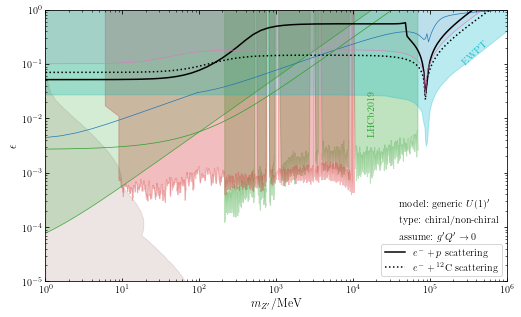

In [16]:
fig, ax = plt.subplots(figsize=(8.27,5))

    
    
model_name_ext ="_rm1e-1"

data=[]
for name in ["CHARMII","TEXONO"]:
    data1=np.loadtxt("data/"+name+"_epsilon.dat")       
    data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
        ])
    data=combine_poly(data1,data)
#     ax.plot(10**data1[:,0],10**data1[:,1],alpha = 0.2,color="C0")
data =10**data
# ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
ax.plot(data[:,0],data[:,1],color="C0",lw=0.7)


# alphas=[0.3,0.6,0.4]
# for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt','BaBar_Lees2014xha',"NA48_Batley2015lha"]):
#     data = 10**recast("data/eps_model/"+limit_name+model_name_ext+".dat")
#     ax.fill(data[:,0],data[:,1],alpha = [0.3,0.3,0.3][i],color=["C2","C3","C4"][i])

#################begin####LHCb, Babar, NA48,KLOE#################
for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt']):
    data = 10**recast("data/eps_model/"+limit_name+model_name_ext+".dat")
    ax.fill(data[:,0],data[:,1],alpha = [0.3,0.3,0.3,0.3][i],color=["C2","C3","C4","C5"][i])
    
    
data=[]
for i,limit_name in enumerate(['BaBar_Lees2014xha',"NA48_Batley2015lha","KLOE_Babusci2012cr"]):
    data1 =recast("data/eps_model/"+limit_name+model_name_ext+".dat")
    data=combine_poly(data1,data)

data=10**data 
ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C3")
#################end #### LHCb, Babar, NA48,KLOE#################


data=10**EWPT     
ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C9")
    
    
    
#################begin beam dump ##
data=[]
for tempi,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw","E774_Bross1989mp",
                                   "Orsay_Davier1989wz"]):
    data1 = recast("data/eps_model/"+limit_name+model_name_ext+".dat",BDlike=True)
    data=combine_poly(data1,data)
data = 10**data 
ax.fill(data[:,0],data[:,1],alpha = 0.15,color="C5")   
#################end beam dump ##

##############begin g-2 bounds ######################
model=imp.load_source("xfs","darkcast/models/eps_model_rm1e-1.py")
xfs=model.xfs
# from darkcast.models.theta_model import xfs
g_2_e_color="C2"

data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
data=np.vstack([     data,[[0,1]]    ])
data=10**data; 
data[:,1]=data[:,1]/(xfs["e"])
ax.fill(data[:,0],data[:,1],alpha = 0.2,color=g_2_e_color)
ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)

data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
#     data=np.vstack([     data,[[0,1]]    ])
data=10**data; 
data[:,1]=data[:,1]/(xfs["mu"])
ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.7)
##############end  g-2 bounds ######################

############## begin LEP bounds ######################
# lep_color="C4"
# data=np.loadtxt(r"data/LEP/U1epsilon.csv",delimiter=",")
# data[:,0]=1e3*data[:,0]
# data=np.vstack([   data, [[data[-1,0],10],[data[0,0],10]]   ])
# ax.fill(data[:,0],data[:,1],alpha = 0.15,color=lep_color)
# ax.plot(data[:,0],data[:,1],color=lep_color,lw=1)

############## end LEP bounds ######################
 


###### other labels ######
# plt.text(70, 7e-4,r"CHARM-II",color="C1",rotation=35,fontsize=8)
# plt.text(25, 3.4e-4,r"Texono",color="C0",rotation=42)

plt.text(1.5e4, 5e-3,r"LHCb2019",color="C2",rotation=90)
# plt.text(1.2e2, 0.3e-3,r"BaBar",color="C3",rotation=90)
# plt.text(5e2, 6e-4,r"LHCb2019",color="C2",rotation=90)
# plt.text(1.5e2, 7e-4,r"BaBar",color="C3",rotation=0)
# plt.text(5e1, 3e-4,r"NA48/2",color="C4",rotation=90)

# plt.text(0.5e1, 4e-3,r"$(g-2)_{\mu}$",color="C3",rotation=5)
# plt.text(0.8e1, 1.6e-3,r"$(g-2)_{e}$",color="C3",rotation=30)
plt.text(2.5e5, 1e-1,r"EWPT",color="C9",rotation=43)
##########################

P2bounds=10**np.loadtxt(r"data/eps_bounds3.csv",delimiter=",")
plt.plot(P2bounds[:,0],P2bounds[:,1],color="k",label=r"$e^-+p$ scattering") 
# P2bounds=10**np.loadtxt(r"data/eps_bounds_C12.csv",delimiter=",")
plt.plot(P2bounds[:,0],P2bounds[:,2],color="k",ls=":",label=r"$e^-+{}^{12}$C scattering") 
# plt.text(5, 0.8e-1,r"P2",color="k",rotation=0)

plt.plot(P2bounds[:,0],P2bounds[:,3],color="C6",lw=0.5) 
data=P2bounds[:,[0,3]]
data=np.vstack([     data,[[1e7,10],[1,10]]    ])
ax.fill(data[:,0],data[:,1],color="C6",alpha=0.1) 


r=2;
ax.text(0.4e5, r*r*0.6e-4,r"model: generic $U(1)'$",color="k",rotation=0)
ax.text(0.4e5, r*0.6e-4,r"type: chiral/non-chiral",color="k",rotation=0)
ax.text(0.4e5, 0.6e-4,r"assume: $g'Q'\rightarrow 0$",color="k",rotation=0)

plt.xlim(1,1e6)
plt.ylim(1e-5,1e-0)
plt.tick_params(which='both', direction='in',top=True,right=True)


plt.xlabel(r"$m_{Z'}/\rm{MeV}$",fontsize=labelsize)
plt.ylabel(r"$\epsilon$",fontsize=labelsize)
plt.legend()
plt.loglog()


plt.savefig(r'../fig_workshop/eps.pdf',bbox_inches='tight')
plt.show()

## $\theta x B$ and $\theta x B-L$  plot 

In [17]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

def combine_poly(xy1,xy2):
    polygon1 = Polygon(xy1)
    polygon2 = Polygon(xy2)
    polygons = [polygon1, polygon2]
    u = cascaded_union(polygons)
    xy3=np.array(u.boundary.xy)
    xy3=np.transpose(xy3)
    return xy3
combine_poly([(0, 0), (5, 3), (5, 0)], [(0, 0), (3, 10), (3, 0)])    

array([[ 3. ,  1.8],
       [ 5. ,  3. ],
       [ 5. ,  0. ],
       [ 3. ,  0. ],
       [ 0. ,  0. ],
       [ 3. , 10. ],
       [ 3. ,  1.8]])

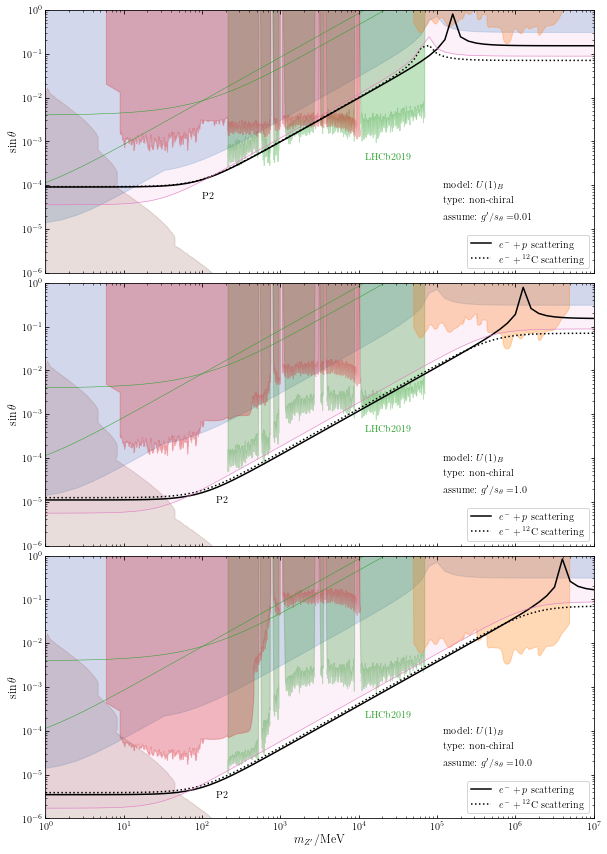

In [18]:
xlist=np.loadtxt("data/theta_x_model/xlist.csv")
import imp

# fig, ax = plt.subplots()
fig, axs = plt.subplots(len(xlist),1,sharex=True, figsize=(8.27,11.7))

   
for iax in range(len(xlist)):
    model_name_ext=str(iax+1)
    ax=axs[iax]
#     charmII=10**np.loadtxt("data/CHARMII.dat")[:,(0,2)]
#     TEXONO=10**np.loadtxt("data/TEXONO.dat")[:,(0,2)]
#     data=[]
#     for name in ["CHARMII_theta.dat","TEXONO_theta.dat"]:
#         data1=np.loadtxt("data/"+name)       
#         data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
#             ])
#         data=combine_poly(data1,data)
#     data=10**data
#     ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    
    data=[]
    for name in ["CHARMII","TEXONO"]:
        data1=np.loadtxt("data/"+name+"_theta.dat")       
        data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
            ])
        data=combine_poly(data1,data)
    data =10**data
    ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")


    
#     data=[]
#     for name in ["CHARMII","TEXONO"]:
#         data1=np.loadtxt("data/theta_x_model/"+name+model_name_ext+".dat")       
#         data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
#             ])
#         data=combine_poly(data1,data)
#     data=10**data
#     ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    
#     data=nu_scattering_null
#     ax.fill(data[:,0],data[:,1],alpha = 0.3)

    
    
    alphas=[0.3,0.5,0.3,0.3]
    for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt']):
        data = 10**recast("data/theta_x_model/"+limit_name+model_name_ext+".dat")
        ax.fill(data[:,0],data[:,1],alpha = alphas[i],color="C2")
        
    data=[]
    for i,limit_name in enumerate(['BaBar_Lees2014xha',"NA48_Batley2015lha","KLOE_Babusci2012cr"]):
        data1 = recast("data/theta_x_model/"+limit_name+model_name_ext+".dat")
        data=combine_poly(data1,data)
        
    data=10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C3")
    
    
    data=[]
    for tempi,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw","E774_Bross1989mp",
                                       "Orsay_Davier1989wz"]):
        data1 = recast("data/theta_x_model/"+limit_name+model_name_ext+".dat",BDlike=True)
        data=combine_poly(data1,data)
    data = 10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C5")
    


     


    ############## begin g-2 bounds ######################

    model=imp.load_source("xfs","darkcast/models/theta_x_model"+str(iax+1)+".py")
    xfs=model.xfs
    g_2_e_color="C2"
#     lr_top=np.array([[5,0],[-1,0]])
#     lgg_2_bounds=np.load(r"data/g_2.npy").tolist()
#     data=[]
#     for e_or_mu in ["lgg_2bound_e","lgg_2bound_mu"]:
#         g_2_bound=np.copy(lgg_2_bounds[e_or_mu])
#         g_2_bound=np.vstack([g_2_bound,[[g_2_bound[-1,0],1],[0,1]] 
#                     ])
#         data=combine_poly(g_2_bound,data)
        
        
#     data=10**data; data[:,1]=data[:,1]/(xfs["e"])
#     ax.fill(data[:,0],data[:,1],alpha = 0.2,color=g_2_e_color)
#     ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)
    data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
    # data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["e"])
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5) 

    data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
    #     data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["mu"])
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)
    ############## end  g-2 bounds ######################
    dijet_color="C1"
    dijet=np.loadtxt(r"data/dijet.csv",delimiter=",");
    dijet[:,0]=1e3* 10**dijet[:,0]
    dijet[:,1]=dijet[:,1]/xfs["u"]
    ax.fill(dijet[:,0],dijet[:,1],alpha=0.3,color=dijet_color)

    ###### other labels ######
    if iax in [0,1,2]:
#         ax.text(4e5, 3e-2,"ATLAS\n CMS\n di-jet",color=dijet_color,rotation=0)
        ax.text(1.2e4, [0.4e-3,0.4e-3,0.2e-3][iax],r"LHCb2019",color="C2",rotation=0)
#         ax.text([0.2e4,7e1,4e1][iax], [0.2e-3,0.4e-4,2e-5][iax],"BaBar\n +NA48/2\n +KLOE",color="C3",rotation=0)
#         ax.text(3e1, 3.0e-4,r"NA48/2+KLOE",color="C4",rotation=0)
#         ax.text(0.3e1, 8e-4,r"$(g-2)_{\mu,\ e}$",color=g_2_e_color,rotation=25) 
#         ax.text(0.2e1, 0.5e-4,r"$\nu+e$ scat.",color="C0",rotation=25) 

#         ax.text(1.5e0, 2e-2,r"Beam Dump",color="C5",rotation=-40)
        ax.text([100,150,150][iax], [5e-5,1e-5,3e-6][iax],r"P2",color="k",rotation=0)
    ##########################
    
    P2bounds=10**np.loadtxt(r"data/theta_x_model/gx_bounds"+str(iax+1)+".csv",delimiter=",")
    ax.plot(P2bounds[:,0],P2bounds[:,1],color="k",label=r"$e^-+p$ scattering") 
    ax.plot(P2bounds[:,0],P2bounds[:,2],color="k",ls=":",label=r"$e^-+{}^{12}$C scattering") 
    ax.plot(P2bounds[:,0],P2bounds[:,3],color="C6",lw=0.5) 
    data=P2bounds[:,[0,3]]
    data=np.vstack([     data,[[1e7,10],[1,10]]    ])
    ax.fill(data[:,0],data[:,1],color="C6",alpha=0.1) 

#     ax.text(300, [1.e-4,3.0e-5,1.0e-5][iax],r"P2",color="k",rotation=0)
    
    
#     ax.text(0.8e5, 1.0e-4,r"$g'/s_{\theta}=$"+str(xlist[iax]),color="k",rotation=0)
#     ax.text(0.8e5, 2.0e-4,r"$U(1)_B$",color="k",rotation=0)
    
    r=2;
    ax.text(1.2e5, r*r*0.2e-4,r"model: $U(1)_B$",color="k",rotation=0)
    ax.text(1.2e5, r*0.2e-4,r"type: non-chiral",color="k",rotation=0)
    ax.text(1.2e5, 0.15e-4,r"assume: $g'/s_{\theta}=$"+str(xlist[iax]),color="k",rotation=0)



    ax.set_xlim(1,1e7)
    ax.set_ylim(1e-6,1e0)
#     ax.set_ylim([1e-5,1e-6,1e-7][iax],[1e-0,1e-1,1e-2][iax])
    ax.legend()
    ax.loglog()

    ax.tick_params(which='both', direction='in',top=True,right=True)
    ax.set_ylabel(r"$\sin \theta$",fontsize=labelsize)


plt.xlabel(r"$m_{Z'}/\rm{MeV}$",fontsize=labelsize)

fig.tight_layout(pad=0.1)


plt.savefig(r'../fig_workshop/thetax.pdf',bbox_inches='tight')
plt.show()

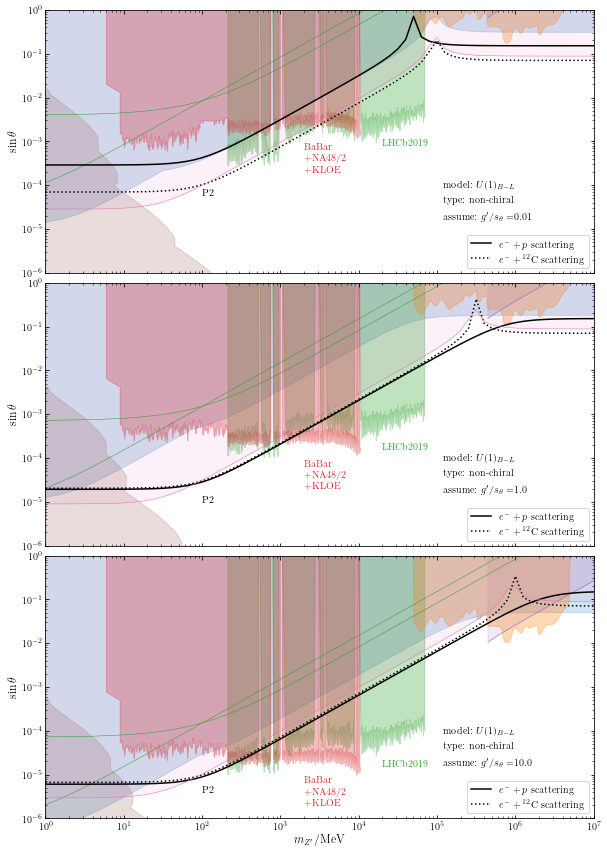

In [19]:
xlist=np.loadtxt("data/theta_xBL_model/xlist.csv")
import imp

# fig, ax = plt.subplots()
fig, axs = plt.subplots(len(xlist),1,sharex=True, figsize=(8.27,11.7))

   
for iax in range(len(xlist)):
    model_name_ext=str(iax+1)
    ax=axs[iax]
#     charmII=10**np.loadtxt("data/CHARMII.dat")[:,(0,2)]
#     TEXONO=10**np.loadtxt("data/TEXONO.dat")[:,(0,2)]


#     data=[]
#     for name in ["CHARMII","TEXONO"]:
#         data1=np.loadtxt("data/theta_xBL_model/"+name+model_name_ext+".dat")       
#         data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
#             ])
#         data=combine_poly(data1,data)
#     data=10**data
#     ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    
    
    
    data=[]
    for name in ["CHARMII","TEXONO"]:
        data1=np.loadtxt("data/"+name+"_theta_B_L.dat")[:,(0,iax+1)]       
        data1=np.vstack([data1,[[data1[-1,0],1],[0,1]] 
            ])
        data=combine_poly(data1,data)
    data =10**data
    ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C0")
    

    
#     data=nu_scattering_null
#     ax.fill(data[:,0],data[:,1],alpha = 0.3)

    
    
    alphas=[0.3,0.5,0.3,0.3]
    for i,limit_name in enumerate(['LHCb_Aaij2019bvg_prompt']):
        data = 10**recast("data/theta_xBL_model/"+limit_name+model_name_ext+".dat")
        ax.fill(data[:,0],data[:,1],alpha = alphas[i],color="C2")
        
    data=[]
    for i,limit_name in enumerate(['BaBar_Lees2014xha',"NA48_Batley2015lha","KLOE_Babusci2012cr"]):
        data1 = recast("data/theta_xBL_model/"+limit_name+model_name_ext+".dat")
        data=combine_poly(data1,data)
        
    data=10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.3,color="C3")
    
    
    data=[]
    for tempi,limit_name in enumerate(["E137_Andreas2012mt","E141_Riordan1987aw","E774_Bross1989mp",
                                       "Orsay_Davier1989wz"]):
        data1 = recast("data/theta_xBL_model/"+limit_name+model_name_ext+".dat",BDlike=True)
        data=combine_poly(data1,data)
    data = 10**data 
    ax.fill(data[:,0],data[:,1],alpha = 0.2,color="C5")
    


     


    ############## begin g-2 bounds ######################

    model=imp.load_source("xfs","darkcast/models/theta_xBL_model"+str(iax+1)+".py")
    xfs=model.xfs
    g_2_e_color="C2"
#     lr_top=np.array([[5,0],[-1,0]])
#     lgg_2_bounds=np.load(r"data/g_2.npy").tolist()
#     data=[]
#     for e_or_mu in ["lgg_2bound_e","lgg_2bound_mu"]:
#         g_2_bound=np.copy(lgg_2_bounds[e_or_mu])
#         g_2_bound=np.vstack([g_2_bound,[[g_2_bound[-1,0],1],[0,1]] 
#                     ])
#         data=combine_poly(g_2_bound,data)
        
        
#     data=10**data; data[:,1]=data[:,1]/(xfs["e"])
#     ax.fill(data[:,0],data[:,1],alpha = 0.2,color=g_2_e_color)
#     ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)


    data=np.loadtxt(r"data/g_2e.csv",delimiter=",")
    # data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["e"])
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5) 

    data=np.loadtxt(r"data/g_2mu.csv",delimiter=",")
    #     data=np.vstack([     data,[[0,1]]    ])
    data=10**data; 
    data[:,1]=data[:,1]/(xfs["mu"])
    ax.plot(data[:,0],data[:,1],color=g_2_e_color,lw=0.5)

    ############## end  g-2 bounds ######################
    
    ############## begin LEP bounds ######################
    lep_color="C4"
    data=np.loadtxt(r"data/LEP/U1thetaBL"+["1.csv","2.csv","3.csv"][iax],delimiter=",")
    data[:,0]=1e3*data[:,0]
    data=np.vstack([   data, [[data[-1,0],10],[data[0,0],10]]   ])
    ax.fill(data[:,0],data[:,1],alpha = 0.15,color=lep_color)
    ax.plot(data[:,0],data[:,1],color=lep_color,lw=0.5)

    ############## end LEP bounds ######################
    
    
    dijet_color="C1"
    dijet=np.loadtxt(r"data/dijet.csv",delimiter=",");
    dijet[:,0]=1e3* 10**dijet[:,0]
    dijet[:,1]=dijet[:,1]/xfs["u"]
    ax.fill(dijet[:,0],dijet[:,1],alpha=0.3,color=dijet_color)

    ###### other labels ######
    if iax in [0,1,2]:
#         ax.text([4e5,4e5,2e5][iax], [3e-2,3e-2,1e-1][iax],"ATLAS\n CMS\n di-jet",color=dijet_color,rotation=0)
        ax.text(2e4, [8e-4,16e-5,16e-6][iax],r"LHCb2019",color="C2",rotation=0)
        ax.text(0.2e4, [2e-4,2e-5,2e-6][iax],"BaBar\n +NA48/2\n +KLOE",color="C3",rotation=0)
#         ax.text(3e1, 3.0e-4,r"NA48/2+KLOE",color="C4",rotation=0)
#         ax.text(0.2e1, [10e-4,1e-4,1e-5][iax],r"$(g-2)_{\mu,\ e}$",color=g_2_e_color,rotation=25) 
#         ax.text([0.2e1,0.2e1,0.5e1][iax], [5e-5,1e-5,3e-6][iax],r"$\nu+e$ scat.",color="C0",rotation=25) 

#         ax.text([2e1,2e1,2e0][iax], [3e-5,1e-5,0.3e-3][iax],r"Beam Dump",color="C5",rotation=-40)
        ax.text(100, [0.6e-4,0.1e-4,4e-6][iax],r"P2",color="k",rotation=0)
    ##########################
    
    P2bounds=10**np.loadtxt(r"data/theta_xBL_model/gx_bounds"+str(iax+1)+".csv",delimiter=",")
    ax.plot(P2bounds[:,0],P2bounds[:,1],color="k",label=r"$e^-+p$ scattering") 
    ax.plot(P2bounds[:,0],P2bounds[:,2],color="k",ls=":",label=r"$e^-+{}^{12}$C scattering") 
    ax.plot(P2bounds[:,0],P2bounds[:,3],color="C6",lw=0.5) 
    data=P2bounds[:,[0,3]]
    data=np.vstack([     data,[[1e7,10],[1,10]]    ])
    ax.fill(data[:,0],data[:,1],color="C6",alpha=0.1) 

#     ax.text(300, [1.e-4,3.0e-5,1.0e-5][iax],r"P2",color="k",rotation=0)
    
    
#     ax.text(1.6e5, 1.0e-4,r"$g'/s_{\theta}=$"+str(xlist[iax]),color="k",rotation=0)
#     ax.text(1.6e5, 2.0e-4,r"$U(1)_{B-L}$",color="k",rotation=0)
    

    r=2;
    ax.text(1.2e5, r*r*0.2e-4,r"model: $U(1)_{B-L}$",color="k",rotation=0)
    ax.text(1.2e5, r*0.2e-4,r"type: non-chiral",color="k",rotation=0)
    ax.text(1.2e5, 0.15e-4,r"assume: $g'/s_{\theta}=$"+str(xlist[iax]),color="k",rotation=0)


    ax.set_xlim(1,1e7)
    ax.set_ylim(1e-6,1e0)
#     ax.set_ylim([1e-5,1e-6,1e-7][iax],[1e-0,1e-1,1e-2][iax])
    ax.legend()
    ax.loglog()

    ax.tick_params(which='both', direction='in',top=True,right=True)
    ax.set_ylabel(r"$\sin \theta$",fontsize=labelsize)


plt.xlabel(r"$m_{Z'}/\rm{MeV}$",fontsize=labelsize)

fig.tight_layout(pad=0.1)


plt.savefig(r'../fig_workshop/theta_xBL_model.pdf',bbox_inches='tight')
plt.show()